# Use of the wflow OpenStreams framework API

This ipython notebook demonstrates how to load an openstreams python model and execute it step-by-step and investigate the (intermediate) results. The first steps is to load the model and framework:


In [2]:
# First import the model. Here we use the HBV version
%pylab inline 

from wflow.wflow_hbv import *
import IPython
from IPython.display import display, clear_output

#clear_output = IPython.core.display.clear_output

ImportError: /home/jaap/anaconda/lib/python2.7/site-packages/PyQt4/../../../libQtGui.so.4: undefined symbol: _ZN20QEventDispatcherGlib16staticMetaObjectE

## Set model run-time parameters

 Set the:
 
 - start and time time
 - set the runid (this is where the results are stored, relative to the casename)
 - set the name of the configfile (stire in the case directory
 - set the clone mape (usually the wflow_subcatch.map)
 - set the casename. This is where all the model the model resides



In [2]:
# define start and stop time of the run
startTime = 1
stopTime = 200
currentTime = 1
     
# set runid, cl;onemap and casename. Also define the ini file
runId = "memtest"
#configfile="wflow_hbv_mem.ini"
configfile="wflow_hbv.ini"
wflow_cloneMap = 'wflow_subcatch.map' 

# the casename points to the complete model setup with both static and dynamic input
caseName="../examples/wflow_rhine_hbv"


In [3]:
#make a usermodel object     
myModel = WflowModel(wflow_cloneMap, caseName,runId,configfile)

# initialise the framework
dynModelFw = wf_DynamicFramework(myModel, stopTime,startTime)


In [4]:
dynModelFw.createRunId(NoOverWrite=False,level=logging.ERROR)
dynModelFw.setQuiet(1)
# Run the initial part of the model (reads parameters and sets initial values)
dynModelFw._runInitial() # Runs initial part

In [5]:
dynModelFw._runResume() # gets the state variables from disk
# Get list of variables supplied by the model
print dynModelFw.wf_supplyVariableNamesAndRoles()

[['Altitude', 0, '2'], ['FreeWater', 2, '4'], ['SoilMoisture', 2, '4'], ['UpperZoneStorage', 2, '4'], ['LowerZoneStorage', 2, '4'], ['InterceptionStorage', 2, '4'], ['SurfaceRunoff', 2, '1'], ['WaterLevel', 2, '2'], ['Percolation', 1, '0']]


## Investigate a couple of model variables

In [6]:
#
sm = dynModelFw.wf_supplyMapAsNumpy("SoilMoisture")
sm[sm == -999] = np.nan
uz = dynModelFw.wf_supplyMapAsNumpy("UpperZoneStorage")
uz[uz == -999] = np.nan
lz = dynModelFw.wf_supplyMapAsNumpy("LowerZoneStorage")
lz[lz == -999] = np.nan
imshow(sm)
title("Soilmoisture")
colorbar()


NameError: name 'np' is not defined

<matplotlib.colorbar.Colorbar instance at 0x000000002214F188>

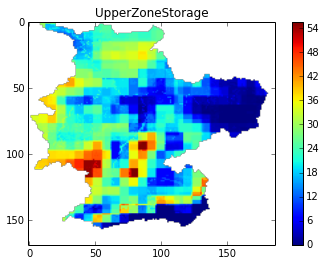

In [41]:
imshow(uz)
title("UpperZoneStorage")
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x000000000CD6EAC8>

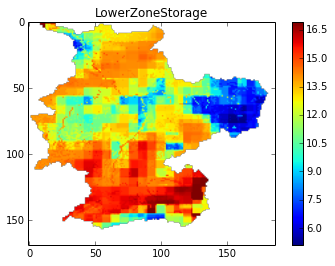

In [42]:
imshow(lz)
title("LowerZoneStorage")
colorbar()

In [9]:
dynModelFw.wf_setValueLdd("TopoLdd",5.0,6.46823,51.6821)
npmap0 = dynModelFw.wf_supplyMapAsNumpy("TopoLdd")
ltt = dynModelFw.wf_supplyMapAsList("SurfaceRunoff")

C:\Users\schelle\AppData\Local\Continuum\Anaconda\lib\site-packages\wflow\wflow_lib.py:528: RuntimeWarning: invalid value encountered in absolute
  col_ =  absolute(diffx) <= (XX[0,0] * tolerance)  # cellsize
C:\Users\schelle\AppData\Local\Continuum\Anaconda\lib\site-packages\wflow\wflow_lib.py:528: RuntimeWarning: invalid value encountered in less_equal
  col_ =  absolute(diffx) <= (XX[0,0] * tolerance)  # cellsize
C:\Users\schelle\AppData\Local\Continuum\Anaconda\lib\site-packages\wflow\wflow_lib.py:529: RuntimeWarning: invalid value encountered in absolute
  row_ =  absolute(diffy) <= (XX[0,0] * tolerance)# cellsize
C:\Users\schelle\AppData\Local\Continuum\Anaconda\lib\site-packages\wflow\wflow_lib.py:529: RuntimeWarning: invalid value encountered in less_equal
  row_ =  absolute(diffy) <= (XX[0,0] * tolerance)# cellsize


## Run for a number of timesteps

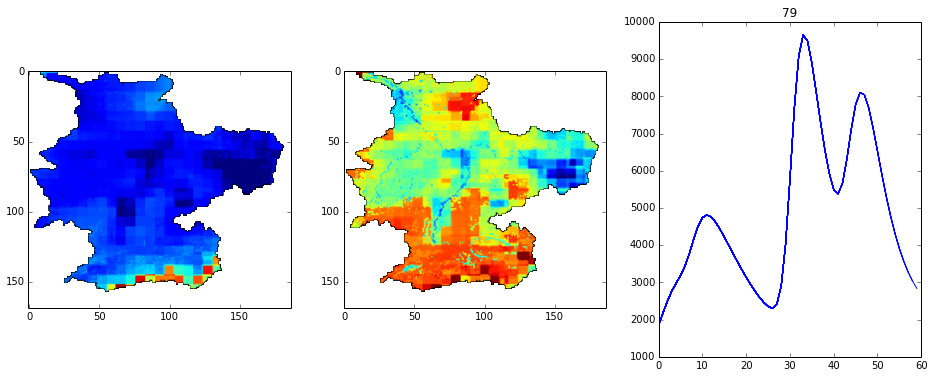

In [43]:
f, ax = plt.subplots(1,3,figsize=(16, 6))

plotar = []

for ts in range(20,80):
         # Get value at pit
      
        inflowQ = dynModelFw.wf_supplyScalar("SurfaceRunoff",6.46823,51.6821)
        plotar.append(inflowQ)
        
        dynModelFw.wf_setValues("PET",scalar(2.0))
        
        dynModelFw._runDynamic(ts,ts) # runs for all timesteps
        npmap1 = dynModelFw.wf_supplyMapAsNumpy("P")
        run = dynModelFw.wf_supplyMapAsNumpy("SurfaceRunoff")
        uz = dynModelFw.wf_supplyMapAsNumpy("UpperZoneStorage")
        sm = dynModelFw.wf_supplyMapAsNumpy("SoilMoisture")
        
        sm[sm == -999] = np.nan
        #dynModelFw.wf_setValues("UpperZoneStorage",uz * 10.1)
        uz[uz == -999] = np.nan
        run[run == -999] = np.nan
        ax[0].imshow(uz)
        ax[1].imshow(sm)
        #ax[2].imshow(log(run))
        ax[2].plot(plotar,'b')
        ax[2].set_title(str(ts))
        clear_output()
        display(f)
        
plt.close()

In [11]:
dynModelFw._runSuspend() # saves the state variables
dynModelFw._wf_shutdown()

In [12]:
run = dynModelFw.wf_supplyMapAsNumpy("SurfaceRunoff")
run[run == -999] = np.nan

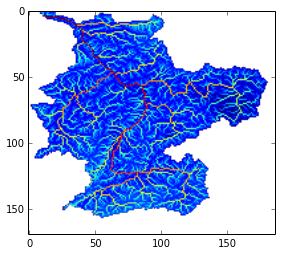

In [15]:
imshow(log(run))